In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics, model_selection, ensemble, neighbors, svm, tree, neural_network, base
import matplotlib.pyplot as plt

import importlib
import datetime
import mlTest
import preprocessing
importlib.reload(mlTest)
importlib.reload(preprocessing)
df = pd.read_csv("data/magic04.data", header=None)
df = preprocessing.convert_numeric(df, [10])
X, y = preprocessing.XySplit(df, 10)
X_train, X_val, X_test, X_train_val, y_train, y_val, y_test, y_train_val = mlTest.train_val_test_split(X, y, train_size=0.8, val_size=0.1)

C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU, Activation
import numpy as np
# mc = keras.callbacks.ModelCheckpoint('MAGIC-weights{epoch:08d}.h5', 
#                                      save_weights_only=True, period=5)
model = Sequential()
model.add(Dense(20,kernel_initializer='lecun_uniform',input_shape=(10,)))
model.add(Activation('relu'))
model.add(Dense(20,kernel_initializer='lecun_uniform'))
model.add(Activation('relu'))
model.add(Dense(8, kernel_initializer='lecun_uniform'))
model.add(Activation('relu'))
model.add(Dense(1, kernel_initializer='lecun_uniform'))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# hist2 = model.fit(X_train.values, y_train.values, epochs=30, validation_data=(X_val.values, y_val.values), callbacks=[mc])
hist = model.fit(X_train.values, y_train.values, epochs=60, validation_data=(X_val.values, y_val.values))

Using TensorFlow backend.


KeyboardInterrupt: 

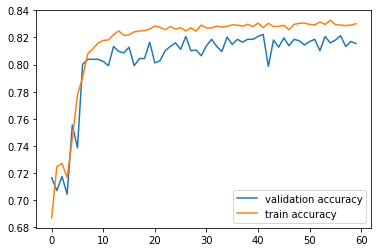

[0.7166140905564766, 0.7071503681590003, 0.7176656152673073, 0.7045215564445994, 0.7555205048572127, 0.7386961097346245, 0.8002103053182207, 0.8038906418061281, 0.8038906418061281, 0.8038906418061281, 0.8023133544891791, 0.799158780356687, 0.8133543642036045, 0.809674027464994, 0.8086225030048663, 0.8128286015974862, 0.7991587804193627, 0.8044164039108405, 0.8044164040988677, 0.8165089383360966, 0.8012618297783484, 0.8028391168445944, 0.8101997898204093, 0.8133543639529015, 0.8159831757299782, 0.8112513147819431, 0.8207150369287164, 0.8101997900084367, 0.8107255524265278, 0.8065194535832049, 0.8138801263083169, 0.818611987507055, 0.8133543641409288, 0.809674027464994, 0.820189274573301, 0.8149316510191476, 0.818611987507055, 0.8165089382734209, 0.818611987507055, 0.818611987507055, 0.8207150369287164, 0.8222923239949624, 0.7986330180012716, 0.8180862251516396, 0.8128286015974862, 0.8196635122178857, 0.8138801265590199, 0.818611987507055, 0.8175604627962243, 0.8144058886637322, 0.817034

In [24]:
plt.plot(range(0, 60), hist.history['val_acc'], label='validation accuracy')
plt.plot(range(0, 60), hist.history['acc'], label='train accuracy')
plt.legend()
plt.show()
print(hist.history['val_acc'])
print(hist.history['acc'])

In [31]:
y_ = model.predict(X_test.values)
y_ = np.where(y_ > 0.5, 1, 0)
accuracy = metrics.accuracy_score(y_test.values, y_)
print(accuracy)

0.8217665615141956


In [29]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU, Activation
import numpy as np
# mc = keras.callbacks.ModelCheckpoint('MAGIC-weights{epoch:08d}.h5', 
#                                      save_weights_only=True, period=5)
model = Sequential()
model.add(Dense(20,kernel_initializer='lecun_uniform',input_shape=(10,)))
model.add(Activation('relu'))
model.add(Dense(8, kernel_initializer='lecun_uniform'))
model.add(Activation('relu'))
model.add(Dense(1, kernel_initializer='lecun_uniform'))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



from sklearn.decomposition import FastICA
ica = FastICA()
X_ICA = ica.fit_transform(X_train)
X_ICA_val = ica.transform(X_val)

hist = model.fit(X_ICA, y_train.values, epochs=60, validation_data=(X_ICA_val, y_val.values))

Train on 15216 samples, validate on 1902 samples
Epoch 1/60
15216/15216 [==============================] - 3s 195us/step - loss: 0.5919 - acc: 0.6923 - val_loss: 0.4919 - val_acc: 0.7697
Epoch 2/60
15216/15216 [==============================] - 2s 157us/step - loss: 0.4608 - acc: 0.7926 - val_loss: 0.4890 - val_acc: 0.7787
Epoch 3/60
15216/15216 [==============================] - 2s 159us/step - loss: 0.4569 - acc: 0.7917 - val_loss: 0.4918 - val_acc: 0.7739
Epoch 4/60
13536/15216 [=========================>....] - ETA: 0s - loss: 0.4533 - acc: 0.7958

KeyboardInterrupt: 

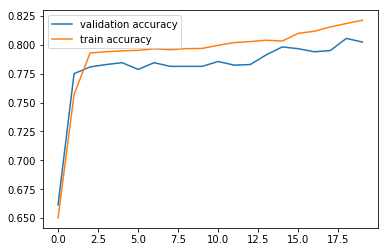

[0.6614090435512434, 0.7749737121956081, 0.7807570981051769, 0.7828601475268383, 0.7844374344050571, 0.7786540486835155, 0.7844374344050571, 0.781282860272565, 0.7812828604605923, 0.7812828604605923, 0.7854889591158878, 0.782334385171423, 0.7828601475268383, 0.7912723452134839, 0.7981072558338835, 0.7965299687676375, 0.7939011569905607, 0.7949526817013914, 0.8054679288096984, 0.8023133546772063]
[0.65017087276551, 0.7568349106203995, 0.7928496319663512, 0.7939668769716088, 0.794689800210305, 0.7951498422712934, 0.7964642481598317, 0.7956756046267087, 0.7965956887486856, 0.7967928496319664, 0.799553101997897, 0.8018533123028391, 0.8027076761303891, 0.8038906414300736, 0.8031677181913774, 0.8098711882229233, 0.81164563617245, 0.8153916929547844, 0.8183491062039958, 0.8211750788643533]


In [14]:
plt.plot(range(0, 20), hist.history['val_acc'], label='validation accuracy')
plt.plot(range(0, 20), hist.history['acc'], label='train accuracy')
plt.legend()
plt.show()
print(hist.history['val_acc'])
print(hist.history['acc'])

In [16]:
hist1 = model.fit(X_ICA, y_train.values, epochs=20, validation_data=(X_ICA_val, y_val.values))

Train on 15216 samples, validate on 1902 samples
Epoch 1/20
15216/15216 [==============================] - 2s 148us/step - loss: 0.3778 - acc: 0.8333 - val_loss: 0.4020 - val_acc: 0.8149
Epoch 2/20
15216/15216 [==============================] - 2s 145us/step - loss: 0.3747 - acc: 0.8356 - val_loss: 0.3980 - val_acc: 0.8165
Epoch 3/20
15216/15216 [==============================] - 2s 145us/step - loss: 0.3711 - acc: 0.8389 - val_loss: 0.3973 - val_acc: 0.8197
Epoch 4/20
15216/15216 [==============================] - 2s 145us/step - loss: 0.3678 - acc: 0.8392 - val_loss: 0.3955 - val_acc: 0.8228
Epoch 5/20
15216/15216 [==============================] - 2s 143us/step - loss: 0.3643 - acc: 0.8431 - val_loss: 0.3900 - val_acc: 0.8260
Epoch 6/20
15216/15216 [==============================] - 2s 145us/step - loss: 0.3622 - acc: 0.8444 - val_loss: 0.3872 - val_acc: 0.8218
Epoch 7/20
15216/15216 [==============================] - 2s 145us/step - loss: 0.3597 - acc: 0.8463 - val_loss: 0.3861 - v

In [21]:
y_ = model.predict(ica.transform(X_test))
y_ = np.where(y_ > 0.5, 1, 0)
accuracy = metrics.accuracy_score(y_test.values, y_)
print(accuracy)

0.8422712933753943


In [18]:
hist1 = model.fit(X_ICA, y_train.values, epochs=20, validation_data=(X_ICA_val, y_val.values))

Train on 15216 samples, validate on 1902 samples
Epoch 1/20
15216/15216 [==============================] - 2s 145us/step - loss: 0.3389 - acc: 0.8591 - val_loss: 0.3587 - val_acc: 0.8470
Epoch 2/20
15216/15216 [==============================] - 2s 144us/step - loss: 0.3377 - acc: 0.8578 - val_loss: 0.3566 - val_acc: 0.8454
Epoch 3/20
15216/15216 [==============================] - 2s 146us/step - loss: 0.3379 - acc: 0.8573 - val_loss: 0.3551 - val_acc: 0.8481
Epoch 4/20
15216/15216 [==============================] - 2s 145us/step - loss: 0.3354 - acc: 0.8602 - val_loss: 0.3552 - val_acc: 0.8533
Epoch 5/20
15216/15216 [==============================] - 2s 144us/step - loss: 0.3350 - acc: 0.8595 - val_loss: 0.3588 - val_acc: 0.8454
Epoch 6/20
15216/15216 [==============================] - 2s 144us/step - loss: 0.3334 - acc: 0.8601 - val_loss: 0.3526 - val_acc: 0.8496
Epoch 7/20
15216/15216 [==============================] - 2s 144us/step - loss: 0.3328 - acc: 0.8623 - val_loss: 0.3547 - v

In [19]:
y_ = model.predict(ica.transform(X_test))
y_ = np.where(y_ > 0.5, 1, 0)
accuracy = metrics.accuracy_score(y_test.values, y_)
print(accuracy)

0.8669821240799159


In [26]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU, Activation
import numpy as np
# mc = keras.callbacks.ModelCheckpoint('MAGIC-weights{epoch:08d}.h5', 
#                                      save_weights_only=True, period=5)
model = Sequential()
model.add(Dense(20,kernel_initializer='lecun_uniform',input_shape=(10,)))
model.add(Activation('relu'))
model.add(Dense(8, kernel_initializer='lecun_uniform'))
model.add(Activation('relu'))
model.add(Dense(1, kernel_initializer='lecun_uniform'))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


from sklearn.decomposition import PCA
pca = PCA()
X_train_dim = pca.fit_transform(X_train)
X_val_dim = pca.transform(X_val)

hist = model.fit(X_train_dim, y_train.values, epochs=60, validation_data=(X_val_dim, y_val.values))

Train on 15216 samples, validate on 1902 samples
Epoch 1/60
15216/15216 [==============================] - 3s 177us/step - loss: 1.0187 - acc: 0.7009 - val_loss: 0.5317 - val_acc: 0.7660
Epoch 2/60
15216/15216 [==============================] - 2s 145us/step - loss: 0.4672 - acc: 0.7881 - val_loss: 0.4872 - val_acc: 0.7897
Epoch 3/60
15216/15216 [==============================] - 2s 147us/step - loss: 0.4364 - acc: 0.8007 - val_loss: 0.4714 - val_acc: 0.7944
Epoch 4/60
15216/15216 [==============================] - 2s 145us/step - loss: 0.4194 - acc: 0.8091 - val_loss: 0.4498 - val_acc: 0.8091
Epoch 5/60
15216/15216 [==============================] - 2s 146us/step - loss: 0.4096 - acc: 0.8134 - val_loss: 0.4523 - val_acc: 0.7981
Epoch 6/60
15216/15216 [==============================] - 2s 144us/step - loss: 0.4067 - acc: 0.8187 - val_loss: 0.4464 - val_acc: 0.8044
Epoch 7/60
15216/15216 [==============================] - 2s 145us/step - loss: 0.3974 - acc: 0.8233 - val_loss: 0.4401 - v

In [27]:
y_ = model.predict(pca.transform(X_test))
y_ = np.where(y_ > 0.5, 1, 0)
accuracy = metrics.accuracy_score(y_test.values, y_)
print(accuracy)

0.8590956887486856


In [34]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU, Activation
import numpy as np
# mc = keras.callbacks.ModelCheckpoint('MAGIC-weights{epoch:08d}.h5', 
#                                      save_weights_only=True, period=5)
model = Sequential()
model.add(Dense(20,kernel_initializer='lecun_uniform',input_shape=(10,)))
model.add(Activation('relu'))
model.add(Dense(8, kernel_initializer='lecun_uniform'))
model.add(Activation('relu'))
model.add(Dense(1, kernel_initializer='lecun_uniform'))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

from sklearn import random_projection
transformer = random_projection.GaussianRandomProjection(n_components=10, random_state=0)
X_train_dim = transformer.fit_transform(X_train)
X_val_dim = transformer.transform(X_val)

hist = model.fit(X_train_dim, y_train.values, epochs=60, validation_data=(X_val_dim, y_val.values))

Train on 15216 samples, validate on 1902 samples
Epoch 1/60
15216/15216 [==============================] - 3s 194us/step - loss: 0.9141 - acc: 0.6678 - val_loss: 0.5691 - val_acc: 0.7024
Epoch 2/60
15216/15216 [==============================] - 2s 147us/step - loss: 0.5114 - acc: 0.7442 - val_loss: 0.4990 - val_acc: 0.7571
Epoch 3/60
15216/15216 [==============================] - 2s 147us/step - loss: 0.4707 - acc: 0.7722 - val_loss: 0.4785 - val_acc: 0.7708
Epoch 4/60
15216/15216 [==============================] - 2s 146us/step - loss: 0.4526 - acc: 0.7831 - val_loss: 0.4655 - val_acc: 0.7834
Epoch 5/60
15216/15216 [==============================] - 2s 146us/step - loss: 0.4409 - acc: 0.7957 - val_loss: 0.4543 - val_acc: 0.7965
Epoch 6/60
15216/15216 [==============================] - 2s 155us/step - loss: 0.4321 - acc: 0.8040 - val_loss: 0.4437 - val_acc: 0.8018
Epoch 7/60
15216/15216 [==============================] - 3s 166us/step - loss: 0.4231 - acc: 0.8105 - val_loss: 0.4315 - v

In [35]:
y_ = model.predict(transformer.transform(X_test))
y_ = np.where(y_ > 0.5, 1, 0)
accuracy = metrics.accuracy_score(y_test.values, y_)
print(accuracy)

0.8275499474237644


## 5 Dimensions

In [44]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU, Activation
import numpy as np
# mc = keras.callbacks.ModelCheckpoint('MAGIC-weights{epoch:08d}.h5', 
#                                      save_weights_only=True, period=5)
model = Sequential()
model.add(Dense(20,kernel_initializer='lecun_uniform',input_shape=(5,)))
model.add(Activation('relu'))
model.add(Dense(8, kernel_initializer='lecun_uniform'))
model.add(Activation('relu'))
model.add(Dense(1, kernel_initializer='lecun_uniform'))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


from sklearn.decomposition import PCA
pca = PCA(n_components=5)
X_train_dim = pca.fit_transform(X_train)
X_val_dim = pca.transform(X_val)

hist = model.fit(X_train_dim, y_train.values, epochs=60, validation_data=(X_val_dim, y_val.values))

Train on 15216 samples, validate on 1902 samples
Epoch 1/60
15216/15216 [==============================] - 3s 209us/step - loss: 1.4254 - acc: 0.7119 - val_loss: 0.6012 - val_acc: 0.7576
Epoch 2/60
15216/15216 [==============================] - 2s 155us/step - loss: 0.5197 - acc: 0.7852 - val_loss: 0.5202 - val_acc: 0.7666
Epoch 3/60
15216/15216 [==============================] - 3s 179us/step - loss: 0.4682 - acc: 0.7986 - val_loss: 0.4775 - val_acc: 0.7797
Epoch 4/60
15216/15216 [==============================] - 3s 185us/step - loss: 0.4433 - acc: 0.8093 - val_loss: 0.4605 - val_acc: 0.7886
Epoch 5/60
15216/15216 [==============================] - 3s 168us/step - loss: 0.4308 - acc: 0.8107 - val_loss: 0.4478 - val_acc: 0.8018
Epoch 6/60
15216/15216 [==============================] - 2s 155us/step - loss: 0.4215 - acc: 0.8156 - val_loss: 0.4546 - val_acc: 0.8023
Epoch 7/60
15216/15216 [==============================] - 3s 176us/step - loss: 0.4171 - acc: 0.8170 - val_loss: 0.4422 - v

In [45]:
y_ = model.predict(pca.transform(X_test))
y_ = np.where(y_ > 0.5, 1, 0)
accuracy = metrics.accuracy_score(y_test.values, y_)
print(accuracy)

0.81335436382755


In [49]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU, Activation
import numpy as np
# mc = keras.callbacks.ModelCheckpoint('MAGIC-weights{epoch:08d}.h5', 
#                                      save_weights_only=True, period=5)
model = Sequential()
model.add(Dense(20,kernel_initializer='lecun_uniform',input_shape=(6,)))
model.add(Activation('relu'))
model.add(Dense(8, kernel_initializer='lecun_uniform'))
model.add(Activation('relu'))
model.add(Dense(1, kernel_initializer='lecun_uniform'))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


from sklearn.decomposition import PCA
pca = PCA(n_components=6)
X_train_dim = pca.fit_transform(X_train)
X_val_dim = pca.transform(X_val)

hist = model.fit(X_train_dim, y_train.values, epochs=60, validation_data=(X_val_dim, y_val.values))

Train on 15216 samples, validate on 1902 samples
Epoch 1/60
15216/15216 [==============================] - 4s 243us/step - loss: 0.8427 - acc: 0.7167 - val_loss: 0.5007 - val_acc: 0.7729
Epoch 2/60
15216/15216 [==============================] - 3s 182us/step - loss: 0.4559 - acc: 0.7963 - val_loss: 0.4689 - val_acc: 0.7913
Epoch 3/60
15216/15216 [==============================] - 3s 188us/step - loss: 0.4327 - acc: 0.8080 - val_loss: 0.4565 - val_acc: 0.7965
Epoch 4/60
15216/15216 [==============================] - 3s 168us/step - loss: 0.4226 - acc: 0.8134 - val_loss: 0.4425 - val_acc: 0.8023
Epoch 5/60
15216/15216 [==============================] - 2s 158us/step - loss: 0.4179 - acc: 0.8162 - val_loss: 0.4450 - val_acc: 0.7955
Epoch 6/60
15216/15216 [==============================] - 2s 157us/step - loss: 0.4136 - acc: 0.8164 - val_loss: 0.4472 - val_acc: 0.7976
Epoch 7/60
15216/15216 [==============================] - 2s 158us/step - loss: 0.4116 - acc: 0.8181 - val_loss: 0.4400 - v

KeyboardInterrupt: 

In [50]:
y_ = model.predict(pca.transform(X_test))
y_ = np.where(y_ > 0.5, 1, 0)
accuracy = metrics.accuracy_score(y_test.values, y_)
print(accuracy)

0.8222923238696109


In [51]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU, Activation
import numpy as np
# mc = keras.callbacks.ModelCheckpoint('MAGIC-weights{epoch:08d}.h5', 
#                                      save_weights_only=True, period=5)
model = Sequential()
model.add(Dense(20,kernel_initializer='lecun_uniform',input_shape=(5,)))
model.add(Activation('relu'))
model.add(Dense(8, kernel_initializer='lecun_uniform'))
model.add(Activation('relu'))
model.add(Dense(1, kernel_initializer='lecun_uniform'))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



from sklearn.decomposition import FastICA
ica = FastICA(n_components=5)
X_ICA = ica.fit_transform(X_train)
X_ICA_val = ica.transform(X_val)

hist = model.fit(X_ICA, y_train.values, epochs=60, validation_data=(X_ICA_val, y_val.values))

Train on 15216 samples, validate on 1902 samples
Epoch 1/60
15216/15216 [==============================] - 3s 212us/step - loss: 0.6273 - acc: 0.6554 - val_loss: 0.5773 - val_acc: 0.7419
Epoch 2/60
15216/15216 [==============================] - 2s 151us/step - loss: 0.5087 - acc: 0.7679 - val_loss: 0.4943 - val_acc: 0.7639
Epoch 3/60
15216/15216 [==============================] - 2s 160us/step - loss: 0.4682 - acc: 0.7865 - val_loss: 0.4947 - val_acc: 0.7650
Epoch 4/60
15216/15216 [==============================] - 3s 166us/step - loss: 0.4619 - acc: 0.7927 - val_loss: 0.4836 - val_acc: 0.7771
Epoch 5/60
15216/15216 [==============================] - 3s 164us/step - loss: 0.4594 - acc: 0.7928 - val_loss: 0.4818 - val_acc: 0.7802
Epoch 6/60
15216/15216 [==============================] - 2s 155us/step - loss: 0.4571 - acc: 0.7951 - val_loss: 0.4862 - val_acc: 0.7781
Epoch 7/60
15216/15216 [==============================] - 3s 174us/step - loss: 0.4570 - acc: 0.7938 - val_loss: 0.4818 - v

In [53]:
y_ = model.predict(ica.transform(X_test))
y_ = np.where(y_ > 0.5, 1, 0)
accuracy = metrics.accuracy_score(y_test.values, y_)
print(accuracy)

0.8038906414300736


In [56]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU, Activation
import numpy as np
# mc = keras.callbacks.ModelCheckpoint('MAGIC-weights{epoch:08d}.h5', 
#                                      save_weights_only=True, period=5)
model = Sequential()
model.add(Dense(20,kernel_initializer='lecun_uniform',input_shape=(5,)))
model.add(Activation('relu'))
model.add(Dense(8, kernel_initializer='lecun_uniform'))
model.add(Activation('relu'))
model.add(Dense(1, kernel_initializer='lecun_uniform'))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

from sklearn import random_projection
transformer = random_projection.GaussianRandomProjection(n_components=5, random_state=0)
X_train_dim = transformer.fit_transform(X_train)
X_val_dim = transformer.transform(X_val)

hist = model.fit(X_train_dim, y_train.values, epochs=60, validation_data=(X_val_dim, y_val.values))

Train on 15216 samples, validate on 1902 samples
Epoch 1/60
15216/15216 [==============================] - 4s 254us/step - loss: 1.0996 - acc: 0.6521 - val_loss: 0.6310 - val_acc: 0.6788
Epoch 2/60
15216/15216 [==============================] - 3s 199us/step - loss: 0.5882 - acc: 0.7073 - val_loss: 0.5659 - val_acc: 0.7171
Epoch 3/60
15216/15216 [==============================] - 3s 195us/step - loss: 0.5483 - acc: 0.7290 - val_loss: 0.5512 - val_acc: 0.7219
Epoch 4/60
15216/15216 [==============================] - 3s 177us/step - loss: 0.5348 - acc: 0.7404 - val_loss: 0.5462 - val_acc: 0.7387
Epoch 5/60
15216/15216 [==============================] - 3s 179us/step - loss: 0.5227 - acc: 0.7516 - val_loss: 0.5337 - val_acc: 0.7450
Epoch 6/60
15216/15216 [==============================] - 3s 179us/step - loss: 0.5127 - acc: 0.7614 - val_loss: 0.5502 - val_acc: 0.7355
Epoch 7/60
15216/15216 [==============================] - 3s 183us/step - loss: 0.5115 - acc: 0.7594 - val_loss: 0.5203 - v

In [57]:
y_ = model.predict(ica.transform(X_test))
y_ = np.where(y_ > 0.5, 1, 0)
accuracy = metrics.accuracy_score(y_test.values, y_)
print(accuracy)

0.6430073606729758


In [59]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU, Activation
import numpy as np
# mc = keras.callbacks.ModelCheckpoint('MAGIC-weights{epoch:08d}.h5', 
#                                      save_weights_only=True, period=5)
model = Sequential()
model.add(Dense(20,kernel_initializer='lecun_uniform',input_shape=(5,)))
model.add(Activation('relu'))
model.add(Dense(8, kernel_initializer='lecun_uniform'))
model.add(Activation('relu'))
model.add(Dense(1, kernel_initializer='lecun_uniform'))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
fvalue_selector = SelectKBest(f_classif, k=5)
X_kbest = fvalue_selector.fit_transform(X, y)
X_train_dim = fvalue_selector.fit_transform(X_train, y_train)
X_val_dim = fvalue_selector.transform(X_val)

hist = model.fit(X_train_dim, y_train.values, epochs=60, validation_data=(X_val_dim, y_val.values))

Train on 15216 samples, validate on 1902 samples
Epoch 1/60
15216/15216 [==============================] - 3s 223us/step - loss: 1.1671 - acc: 0.6572 - val_loss: 0.6044 - val_acc: 0.7114
Epoch 2/60
15216/15216 [==============================] - 2s 153us/step - loss: 0.5555 - acc: 0.7262 - val_loss: 0.5410 - val_acc: 0.7434
Epoch 3/60
15216/15216 [==============================] - 2s 151us/step - loss: 0.4972 - acc: 0.7791 - val_loss: 0.4984 - val_acc: 0.7860
Epoch 4/60
15216/15216 [==============================] - 2s 152us/step - loss: 0.4641 - acc: 0.7994 - val_loss: 0.4738 - val_acc: 0.7923
Epoch 5/60
15216/15216 [==============================] - 2s 151us/step - loss: 0.4487 - acc: 0.8091 - val_loss: 0.4676 - val_acc: 0.7907
Epoch 6/60
15216/15216 [==============================] - 2s 151us/step - loss: 0.4349 - acc: 0.8162 - val_loss: 0.4552 - val_acc: 0.8023
Epoch 7/60
15216/15216 [==============================] - 2s 151us/step - loss: 0.4281 - acc: 0.8194 - val_loss: 0.4522 - v

In [60]:
y_ = model.predict(fvalue_selector.transform(X_test))
y_ = np.where(y_ > 0.5, 1, 0)
accuracy = metrics.accuracy_score(y_test.values, y_)
print(accuracy)

0.8275499474237644


# CLUSTERING

In [117]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU, Activation
import numpy as np
# mc = keras.callbacks.ModelCheckpoint('MAGIC-weights{epoch:08d}.h5', 
#                                      save_weights_only=True, period=5)
model = Sequential()
model.add(Dense(20,kernel_initializer='lecun_uniform',input_shape=(5,)))
model.add(Activation('relu'))
model.add(Dense(8, kernel_initializer='lecun_uniform'))
model.add(Activation('relu'))
model.add(Dense(1, kernel_initializer='lecun_uniform'))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_classif
# fvalue_selector = SelectKBest(f_classif, k=5)
# X_kbest = fvalue_selector.fit_transform(X, y)
# X_train_dim = fvalue_selector.fit_transform(X_train, y_train)
# X_val_dim = fvalue_selector.transform(X_val)
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)
km = km.fit(X_train)
X_train_kmeans = km.predict(X_train)
X_val_kmeans = km.predict(X_val)
X_test_kmeans = km.predict(X_test)

from keras.utils import to_categorical
X_train_kmeans = to_categorical(X_train_kmeans)
X_val_kmeans = to_categorical(X_val_kmeans)
X_test_kmeans = to_categorical(X_test_kmeans)

# print(X_train_kmeans)
hist = model.fit(X_train_kmeans, y_train.values, epochs=60, validation_data=(X_val_kmeans, y_val.values))

Train on 15216 samples, validate on 1902 samples
Epoch 1/60
15216/15216 [==============================] - 4s 272us/step - loss: 0.6257 - acc: 0.6598 - val_loss: 0.6128 - val_acc: 0.6882
Epoch 2/60
15216/15216 [==============================] - 2s 160us/step - loss: 0.6062 - acc: 0.6925 - val_loss: 0.6128 - val_acc: 0.6882
Epoch 3/60
15216/15216 [==============================] - 2s 161us/step - loss: 0.6059 - acc: 0.6925 - val_loss: 0.6130 - val_acc: 0.6882
Epoch 4/60
15216/15216 [==============================] - 2s 163us/step - loss: 0.6059 - acc: 0.6925 - val_loss: 0.6129 - val_acc: 0.6882
Epoch 5/60
 2368/15216 [===>..........................] - ETA: 2s - loss: 0.6184 - acc: 0.6820

KeyboardInterrupt: 

In [118]:
y_ = model.predict(X_test_kmeans)
y_ = np.where(y_ > 0.5, 1, 0)
accuracy = metrics.accuracy_score(y_test.values, y_)
print(accuracy)

0.6887486855941115


In [102]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU, Activation
import numpy as np
# mc = keras.callbacks.ModelCheckpoint('MAGIC-weights{epoch:08d}.h5', 
#                                      save_weights_only=True, period=5)
model = Sequential()
model.add(Dense(20,kernel_initializer='lecun_uniform',input_shape=(5,)))
model.add(Activation('relu'))
model.add(Dense(8, kernel_initializer='lecun_uniform'))
model.add(Activation('relu'))
model.add(Dense(1, kernel_initializer='lecun_uniform'))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_classif
# fvalue_selector = SelectKBest(f_classif, k=5)
# X_kbest = fvalue_selector.fit_transform(X, y)
# X_train_dim = fvalue_selector.fit_transform(X_train, y_train)
# X_val_dim = fvalue_selector.transform(X_val)
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
km = GaussianMixture(n_components=5)
km = km.fit(X_train)
X_train_kmeans = km.predict_proba(X_train)
X_val_kmeans = km.predict_proba(X_val)
X_test_kmeans = km.predict_proba(X_test)

print(X_train_kmeans[0])
# from keras.utils import to_categorical
# X_train_kmeans = to_categorical(X_train_kmeans)
# X_val_kmeans = to_categorical(X_val_kmeans)
# X_test_kmeans = to_categorical(X_test_kmeans)

# print(X_train_kmeans)
hist = model.fit(X_train_kmeans, y_train.values, epochs=60, validation_data=(X_val_kmeans, y_val.values))

[9.99628748e-001 1.48928695e-046 3.71252174e-004 1.42255991e-010
 7.05858580e-111]
Train on 15216 samples, validate on 1902 samples
Epoch 1/60
15216/15216 [==============================] - 4s 258us/step - loss: 0.5065 - acc: 0.7656 - val_loss: 0.4660 - val_acc: 0.7855
Epoch 2/60
15216/15216 [==============================] - 2s 159us/step - loss: 0.4534 - acc: 0.7896 - val_loss: 0.4622 - val_acc: 0.7886
Epoch 3/60
15216/15216 [==============================] - 2s 155us/step - loss: 0.4518 - acc: 0.7930 - val_loss: 0.4617 - val_acc: 0.7865
Epoch 4/60
15216/15216 [==============================] - 3s 177us/step - loss: 0.4509 - acc: 0.7914 - val_loss: 0.4609 - val_acc: 0.7913
Epoch 5/60
15216/15216 [==============================] - 3s 172us/step - loss: 0.4499 - acc: 0.7923 - val_loss: 0.4600 - val_acc: 0.7881
Epoch 6/60
15216/15216 [==============================] - 3s 179us/step - loss: 0.4491 - acc: 0.7909 - val_loss: 0.4619 - val_acc: 0.7944
Epoch 7/60
15216/15216 [================

15216/15216 [==============================] - 2s 161us/step - loss: 0.4300 - acc: 0.8018 - val_loss: 0.4476 - val_acc: 0.7944
Epoch 60/60
15216/15216 [==============================] - 2s 160us/step - loss: 0.4296 - acc: 0.8005 - val_loss: 0.4490 - val_acc: 0.7939


In [103]:
y_ = model.predict(X_test_kmeans)
y_ = np.where(y_ > 0.5, 1, 0)
accuracy = metrics.accuracy_score(y_test.values, y_)
print(accuracy)

0.7975814931650894


In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU, Activation
import numpy as np
# mc = keras.callbacks.ModelCheckpoint('MAGIC-weights{epoch:08d}.h5', 
#                                      save_weights_only=True, period=5)
model = Sequential()
model.add(Dense(20,kernel_initializer='lecun_uniform',input_shape=(5,)))
model.add(Activation('relu'))
model.add(Dense(8, kernel_initializer='lecun_uniform'))
model.add(Activation('relu'))
model.add(Dense(1, kernel_initializer='lecun_uniform'))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_classif
# fvalue_selector = SelectKBest(f_classif, k=5)
# X_kbest = fvalue_selector.fit_transform(X, y)
# X_train_dim = fvalue_selector.fit_transform(X_train, y_train)
# X_val_dim = fvalue_selector.transform(X_val)
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
km = GaussianMixture(n_components=5)
km = km.fit(X_train)
X_train_kmeans = km.predict(X_train)
X_val_kmeans = km.predict(X_val)
X_test_kmeans = km.predict(X_test)

print(X_train_kmeans[0])
from keras.utils import to_categorical
X_train_kmeans = to_categorical(X_train_kmeans)
X_val_kmeans = to_categorical(X_val_kmeans)
X_test_kmeans = to_categorical(X_test_kmeans)

# print(X_train_kmeans)
hist = model.fit(X_train_kmeans, y_train.values, epochs=60, validation_data=(X_val_kmeans, y_val.values))

0
Train on 15216 samples, validate on 1902 samples
Epoch 1/60
15216/15216 [==============================] - 4s 267us/step - loss: 0.5547 - acc: 0.7336 - val_loss: 0.4777 - val_acc: 0.7739
Epoch 2/60
15216/15216 [==============================] - 2s 147us/step - loss: 0.4848 - acc: 0.7693 - val_loss: 0.4783 - val_acc: 0.7739
Epoch 3/60
15216/15216 [==============================] - 2s 149us/step - loss: 0.4850 - acc: 0.7693 - val_loss: 0.4776 - val_acc: 0.7739
Epoch 4/60
15216/15216 [==============================] - 2s 152us/step - loss: 0.4847 - acc: 0.7693 - val_loss: 0.4772 - val_acc: 0.7739
Epoch 5/60
15216/15216 [==============================] - 2s 150us/step - loss: 0.4849 - acc: 0.7693 - val_loss: 0.4779 - val_acc: 0.7739
Epoch 6/60
15216/15216 [==============================] - 3s 166us/step - loss: 0.4850 - acc: 0.7693 - val_loss: 0.4774 - val_acc: 0.7739
Epoch 7/60
15216/15216 [==============================] - 2s 158us/step - loss: 0.4849 - acc: 0.7693 - val_loss: 0.4769 -

KeyboardInterrupt: 

In [4]:
y_ = model.predict(X_test_kmeans)
y_ = np.where(y_ > 0.5, 1, 0)
accuracy = metrics.accuracy_score(y_test.values, y_)
print(accuracy)

0.7770767613038907


In [119]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU, Activation
import numpy as np
# mc = keras.callbacks.ModelCheckpoint('MAGIC-weights{epoch:08d}.h5', 
#                                      save_weights_only=True, period=5)
model = Sequential()
model.add(Dense(20,kernel_initializer='lecun_uniform',input_shape=(5,)))
model.add(Activation('relu'))
model.add(Dense(8, kernel_initializer='lecun_uniform'))
model.add(Activation('relu'))
model.add(Dense(1, kernel_initializer='lecun_uniform'))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_classif
# fvalue_selector = SelectKBest(f_classif, k=5)
# X_kbest = fvalue_selector.fit_transform(X, y)
# X_train_dim = fvalue_selector.fit_transform(X_train, y_train)
# X_val_dim = fvalue_selector.transform(X_val)

from sklearn.decomposition import FastICA
ica = FastICA(n_components=10)
X_ICA = ica.fit_transform(X_train)
X_ICA_val = ica.transform(X_val)
X_ICA_test = ica.transform(X_test)

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
km = KMeans(n_clusters=5)
km = km.fit(X_ICA)
X_train_kmeans = km.predict(X_ICA)
X_val_kmeans = km.predict(X_ICA_val)
X_test_kmeans = km.predict(X_ICA_test)

# from keras.utils import to_categorical
X_train_kmeans = to_categorical(X_train_kmeans)
X_val_kmeans = to_categorical(X_val_kmeans)
X_test_kmeans = to_categorical(X_test_kmeans)

# print(X_train_kmeans)
hist = model.fit(X_train_kmeans, y_train.values, epochs=60, validation_data=(X_val_kmeans, y_val.values))

C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\decomposition\fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Train on 15216 samples, validate on 1902 samples
Epoch 1/60
15216/15216 [==============================] - 4s 276us/step - loss: 0.6092 - acc: 0.6995 - val_loss: 0.6052 - val_acc: 0.6940
Epoch 2/60
15216/15216 [==============================] - 2s 162us/step - loss: 0.5880 - acc: 0.7008 - val_loss: 0.6048 - val_acc: 0.6940
Epoch 3/60
15216/15216 [==============================] - 3s 165us/step - loss: 0.5878 - acc: 0.7017 - val_loss: 0.6047 - val_acc: 0.6940
Epoch 4/60
15216/15216 [==============================] - 3s 176us/step - loss: 0.5878 - acc: 0.7017 - val_loss: 0.6053 - val_acc: 0.6940
Epoch 5/60
15216/15216 [==============================] - 3s 166us/step - loss: 0.5879 - acc: 0.7017 - val_loss: 0.6050 - val_acc: 0.6940
Epoch 6/60
15216/15216 [==============================] - 2s 163us/step - loss: 0.5877 - acc: 0.7017 - val_loss: 0.6064 - val_acc: 0.6940
Epoch 7/60
 9248/15216 [=================>............] - ETA: 0s - loss: 0.5890 - acc: 0.6999

KeyboardInterrupt: 

In [115]:
y_ = model.predict(X_test_kmeans)
y_ = np.where(y_ > 0.5, 1, 0)
accuracy = metrics.accuracy_score(y_test.values, y_)
print(accuracy)

0.7450052576235542


In [133]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU, Activation
import numpy as np
# mc = keras.callbacks.ModelCheckpoint('MAGIC-weights{epoch:08d}.h5', 
#                                      save_weights_only=True, period=5)
model = Sequential()
model.add(Dense(20,kernel_initializer='lecun_uniform',input_shape=(5,)))
model.add(Activation('relu'))
model.add(Dense(8, kernel_initializer='lecun_uniform'))
model.add(Activation('relu'))
model.add(Dense(1, kernel_initializer='lecun_uniform'))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_classif
# fvalue_selector = SelectKBest(f_classif, k=5)
# X_kbest = fvalue_selector.fit_transform(X, y)
# X_train_dim = fvalue_selector.fit_transform(X_train, y_train)
# X_val_dim = fvalue_selector.transform(X_val)

from sklearn.decomposition import FastICA
ica = FastICA(n_components=7)
X_ICA = ica.fit_transform(X_train)
X_ICA_val = ica.transform(X_val)
X_ICA_test = ica.transform(X_test)

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
km = GaussianMixture(n_components=5)
km = km.fit(X_ICA)
X_train_kmeans = km.predict_proba(X_ICA)
X_val_kmeans = km.predict_proba(X_ICA_val)
X_test_kmeans = km.predict_proba(X_ICA_test)

# from keras.utils import to_categorical
# X_train_kmeans = to_categorical(X_train_kmeans)
# X_val_kmeans = to_categorical(X_val_kmeans)
# X_test_kmeans = to_categorical(X_test_kmeans)

# print(X_train_kmeans)
hist = model.fit(X_train_kmeans, y_train.values, epochs=60, validation_data=(X_val_kmeans, y_val.values))

Train on 15216 samples, validate on 1902 samples
Epoch 1/60
15216/15216 [==============================] - 5s 309us/step - loss: 0.5145 - acc: 0.7344 - val_loss: 0.4757 - val_acc: 0.7645
Epoch 2/60
15216/15216 [==============================] - 3s 196us/step - loss: 0.4528 - acc: 0.7794 - val_loss: 0.4756 - val_acc: 0.7581
Epoch 3/60
15216/15216 [==============================] - 3s 210us/step - loss: 0.4518 - acc: 0.7812 - val_loss: 0.4761 - val_acc: 0.7734
Epoch 4/60
15216/15216 [==============================] - 3s 205us/step - loss: 0.4510 - acc: 0.7820 - val_loss: 0.4740 - val_acc: 0.7681
Epoch 5/60
15216/15216 [==============================] - 3s 188us/step - loss: 0.4498 - acc: 0.7816 - val_loss: 0.4735 - val_acc: 0.7734
Epoch 6/60
15216/15216 [==============================] - 3s 180us/step - loss: 0.4489 - acc: 0.7824 - val_loss: 0.4736 - val_acc: 0.7676
Epoch 7/60
15216/15216 [==============================] - 3s 195us/step - loss: 0.4485 - acc: 0.7833 - val_loss: 0.4718 - v

In [134]:
y_ = model.predict(X_test_kmeans)
y_ = np.where(y_ > 0.5, 1, 0)
accuracy = metrics.accuracy_score(y_test.values, y_)
print(accuracy)

0.7928496319663512


In [138]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU, Activation
import numpy as np
# mc = keras.callbacks.ModelCheckpoint('MAGIC-weights{epoch:08d}.h5', 
#                                      save_weights_only=True, period=5)
model = Sequential()
model.add(Dense(20,kernel_initializer='lecun_uniform',input_shape=(10,)))
model.add(Activation('relu'))
model.add(Dense(8, kernel_initializer='lecun_uniform'))
model.add(Activation('relu'))
model.add(Dense(1, kernel_initializer='lecun_uniform'))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_classif
# fvalue_selector = SelectKBest(f_classif, k=5)
# X_kbest = fvalue_selector.fit_transform(X, y)
# X_train_dim = fvalue_selector.fit_transform(X_train, y_train)
# X_val_dim = fvalue_selector.transform(X_val)

from sklearn.decomposition import FastICA
ica = FastICA(n_components=5)
X_ICA = ica.fit_transform(X_train)
X_ICA_val = ica.transform(X_val)
X_ICA_test = ica.transform(X_test)

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
km = GaussianMixture(n_components=5)
km = km.fit(X_train)
X_train_kmeans = km.predict_proba(X_train)
X_val_kmeans = km.predict_proba(X_val)
X_test_kmeans = km.predict_proba(X_test)

# from keras.utils import to_categorical
# X_train_kmeans = to_categorical(X_train_kmeans)
# X_val_kmeans = to_categorical(X_val_kmeans)
# X_test_kmeans = to_categorical(X_test_kmeans)

X_train_comb = np.concatenate((X_ICA, X_train_kmeans), axis = 1)
X_val_comb = np.concatenate((X_ICA_val, X_val_kmeans), axis = 1)
X_test_comb = np.concatenate((X_ICA_test, X_test_kmeans), axis = 1)
print(X_train_comb.shape)

# print(X_train_kmeans)
hist = model.fit(X_train_comb, y_train.values, epochs=60, validation_data=(X_val_comb, y_val.values))

(15216, 10)
Train on 15216 samples, validate on 1902 samples
Epoch 1/60
15216/15216 [==============================] - 5s 308us/step - loss: 0.5120 - acc: 0.7604 - val_loss: 0.4559 - val_acc: 0.7760
Epoch 2/60
15216/15216 [==============================] - 3s 168us/step - loss: 0.4403 - acc: 0.7842 - val_loss: 0.4503 - val_acc: 0.7766
Epoch 3/60
15216/15216 [==============================] - 3s 168us/step - loss: 0.4347 - acc: 0.7870 - val_loss: 0.4478 - val_acc: 0.7792
Epoch 4/60
15216/15216 [==============================] - 3s 167us/step - loss: 0.4291 - acc: 0.7909 - val_loss: 0.4415 - val_acc: 0.7802
Epoch 5/60
15216/15216 [==============================] - 3s 170us/step - loss: 0.4239 - acc: 0.7953 - val_loss: 0.4365 - val_acc: 0.7823
Epoch 6/60
15216/15216 [==============================] - 3s 182us/step - loss: 0.4192 - acc: 0.7980 - val_loss: 0.4343 - val_acc: 0.7839
Epoch 7/60
15216/15216 [==============================] - 3s 169us/step - loss: 0.4151 - acc: 0.8005 - val_loss

In [140]:
y_ = model.predict(X_test_comb)
y_ = np.where(y_ > 0.5, 1, 0)
accuracy = metrics.accuracy_score(y_test.values, y_)
print(accuracy)

0.8159831756046267


In [158]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU, Activation
import numpy as np
# mc = keras.callbacks.ModelCheckpoint('MAGIC-weights{epoch:08d}.h5', 
#                                      save_weights_only=True, period=5)
model = Sequential()
model.add(Dense(20,kernel_initializer='lecun_uniform',input_shape=(13,)))
model.add(Activation('relu'))
model.add(Dense(8, kernel_initializer='lecun_uniform'))
model.add(Activation('relu'))
model.add(Dense(1, kernel_initializer='lecun_uniform'))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_classif
# fvalue_selector = SelectKBest(f_classif, k=5)
# X_kbest = fvalue_selector.fit_transform(X, y)
# X_train_dim = fvalue_selector.fit_transform(X_train, y_train)
# X_val_dim = fvalue_selector.transform(X_val)

from sklearn.decomposition import FastICA
ica = FastICA(n_components=10)
X_ICA = ica.fit_transform(X_train)
X_ICA_val = ica.transform(X_val)
X_ICA_test = ica.transform(X_test)

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
km = GaussianMixture(n_components=3)
km = km.fit(X_train)
X_train_kmeans = km.predict_proba(X_train)
X_val_kmeans = km.predict_proba(X_val)
X_test_kmeans = km.predict_proba(X_test)

# from keras.utils import to_categorical
# X_train_kmeans = to_categorical(X_train_kmeans)
# X_val_kmeans = to_categorical(X_val_kmeans)
# X_test_kmeans = to_categorical(X_test_kmeans)

X_train_comb = np.concatenate((X_ICA, X_train_kmeans), axis = 1)
X_val_comb = np.concatenate((X_ICA_val, X_val_kmeans), axis = 1)
X_test_comb = np.concatenate((X_ICA_test, X_test_kmeans), axis = 1)
print(X_train_comb.shape)

# print(X_train_kmeans)
hist = model.fit(X_train_comb, y_train.values, epochs=60, validation_data=(X_val_comb, y_val.values))

C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\decomposition\fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


(15216, 13)
Train on 15216 samples, validate on 1902 samples
Epoch 1/60
15216/15216 [==============================] - 5s 339us/step - loss: 0.5472 - acc: 0.7371 - val_loss: 0.4912 - val_acc: 0.7687
Epoch 2/60
15216/15216 [==============================] - 3s 174us/step - loss: 0.4642 - acc: 0.7766 - val_loss: 0.4853 - val_acc: 0.7708
Epoch 3/60
15216/15216 [==============================] - 3s 182us/step - loss: 0.4545 - acc: 0.7777 - val_loss: 0.4754 - val_acc: 0.7744
Epoch 4/60
15216/15216 [==============================] - 3s 180us/step - loss: 0.4431 - acc: 0.7857 - val_loss: 0.4672 - val_acc: 0.7992
Epoch 5/60
15216/15216 [==============================] - 3s 174us/step - loss: 0.4294 - acc: 0.8047 - val_loss: 0.4509 - val_acc: 0.7960
Epoch 6/60
15216/15216 [==============================] - 3s 174us/step - loss: 0.4158 - acc: 0.8160 - val_loss: 0.4418 - val_acc: 0.8002
Epoch 7/60
15216/15216 [==============================] - 3s 179us/step - loss: 0.4058 - acc: 0.8225 - val_loss

In [143]:
y_ = model.predict(X_test_comb)
y_ = np.where(y_ > 0.5, 1, 0)
accuracy = metrics.accuracy_score(y_test.values, y_)
print(accuracy)

0.8585699263932702


In [160]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU, Activation
import numpy as np
# mc = keras.callbacks.ModelCheckpoint('MAGIC-weights{epoch:08d}.h5', 
#                                      save_weights_only=True, period=5)
model = Sequential()
model.add(Dense(20,kernel_initializer='lecun_uniform',input_shape=(10,)))
model.add(Activation('relu'))
model.add(Dense(8, kernel_initializer='lecun_uniform'))
model.add(Activation('relu'))
model.add(Dense(1, kernel_initializer='lecun_uniform'))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_classif
# fvalue_selector = SelectKBest(f_classif, k=5)
# X_kbest = fvalue_selector.fit_transform(X, y)
# X_train_dim = fvalue_selector.fit_transform(X_train, y_train)
# X_val_dim = fvalue_selector.transform(X_val)

from sklearn.decomposition import FastICA
ica = FastICA(n_components=7)
X_ICA = ica.fit_transform(X_train)
X_ICA_val = ica.transform(X_val)
X_ICA_test = ica.transform(X_test)

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
km = GaussianMixture(n_components=3)
km = km.fit(X_train)
X_train_kmeans = km.predict_proba(X_train)
X_val_kmeans = km.predict_proba(X_val)
X_test_kmeans = km.predict_proba(X_test)

# from keras.utils import to_categorical
# X_train_kmeans = to_categorical(X_train_kmeans)
# X_val_kmeans = to_categorical(X_val_kmeans)
# X_test_kmeans = to_categorical(X_test_kmeans)

X_train_comb = np.concatenate((X_ICA, X_train_kmeans), axis = 1)
X_val_comb = np.concatenate((X_ICA_val, X_val_kmeans), axis = 1)
X_test_comb = np.concatenate((X_ICA_test, X_test_kmeans), axis = 1)
print(X_train_comb.shape)

# print(X_train_kmeans)
hist = model.fit(X_train_comb, y_train.values, epochs=60, validation_data=(X_val_comb, y_val.values))

(15216, 10)
Train on 15216 samples, validate on 1902 samples
Epoch 1/60
15216/15216 [==============================] - 5s 355us/step - loss: 0.5623 - acc: 0.7416 - val_loss: 0.4906 - val_acc: 0.7676
Epoch 2/60
15216/15216 [==============================] - 3s 176us/step - loss: 0.4642 - acc: 0.7758 - val_loss: 0.4855 - val_acc: 0.7708
Epoch 3/60
15216/15216 [==============================] - 3s 190us/step - loss: 0.4573 - acc: 0.7764 - val_loss: 0.4776 - val_acc: 0.7718
Epoch 4/60
15216/15216 [==============================] - 3s 191us/step - loss: 0.4495 - acc: 0.7795 - val_loss: 0.4747 - val_acc: 0.7808
Epoch 5/60
15216/15216 [==============================] - 3s 179us/step - loss: 0.4421 - acc: 0.7895 - val_loss: 0.4651 - val_acc: 0.7744
Epoch 6/60
15216/15216 [==============================] - 3s 173us/step - loss: 0.4336 - acc: 0.7978 - val_loss: 0.4555 - val_acc: 0.7839
Epoch 7/60
15216/15216 [==============================] - 3s 194us/step - loss: 0.4265 - acc: 0.8021 - val_loss

In [ ]:
y_ = model.predict(X_test_comb)
y_ = np.where(y_ > 0.5, 1, 0)
accuracy = metrics.accuracy_score(y_test.values, y_)
print(accuracy)

[1.59834648e+03 1.13544126e+03 2.16394402e+02 1.13813546e+01
 6.31846032e-01 5.03203921e+02 6.01728740e+02 2.05423661e-01
 4.19801232e+03 6.45388515e+01]
[8 0 1 6 5]


NameError: name 'prnitsdf' is not defined

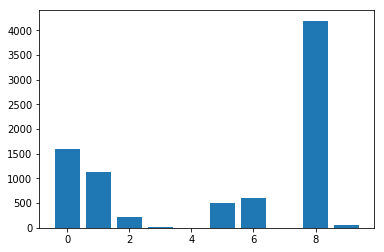

In [173]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU, Activation
import numpy as np
# mc = keras.callbacks.ModelCheckpoint('MAGIC-weights{epoch:08d}.h5', 
#                                      save_weights_only=True, period=5)
model = Sequential()
model.add(Dense(20,kernel_initializer='lecun_uniform',input_shape=(7,)))
model.add(Activation('relu'))
model.add(Dense(8, kernel_initializer='lecun_uniform'))
model.add(Activation('relu'))
model.add(Dense(1, kernel_initializer='lecun_uniform'))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
fvalue_selector = SelectKBest(f_classif, k=5)
fvalue_selector.fit(X_train, y_train)
# X_kbest = fvalue_selector.fit_transform(X, y)
# X_train_dim = fvalue_selector.fit_transform(X_train, y_train)
# X_val_dim = fvalue_selector.transform(X_val)

print(fvalue_selector.scores_)
print(fvalue_selector.scores_.argsort()[-5:][::-1])
plt.bar(range(10), fvalue_selector.scores_)
prnitsdf

X_ICA = fvalue_selector.transform(X_train)
X_ICA_val = fvalue_selector.transform(X_val)
X_ICA_test = fvalue_selector.transform(X_test)

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
km = GaussianMixture(n_components=2)
km = km.fit(X_train)
X_train_kmeans = km.predict_proba(X_train)
X_val_kmeans = km.predict_proba(X_val)
X_test_kmeans = km.predict_proba(X_test)

# from keras.utils import to_categorical
# X_train_kmeans = to_categorical(X_train_kmeans)
# X_val_kmeans = to_categorical(X_val_kmeans)
# X_test_kmeans = to_categorical(X_test_kmeans)

X_train_comb = np.concatenate((X_ICA, X_train_kmeans), axis = 1)
X_val_comb = np.concatenate((X_ICA_val, X_val_kmeans), axis = 1)
X_test_comb = np.concatenate((X_ICA_test, X_test_kmeans), axis = 1)
print(X_train_comb.shape)

# print(X_train_kmeans)
hist = model.fit(X_train_comb, y_train.values, epochs=60, validation_data=(X_val_comb, y_val.values))

In [161]:
y_ = model.predict(X_test_comb)
y_ = np.where(y_ > 0.5, 1, 0)
accuracy = metrics.accuracy_score(y_test.values, y_)
print(accuracy)

0.825446898002103


In [166]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU, Activation
import numpy as np
# mc = keras.callbacks.ModelCheckpoint('MAGIC-weights{epoch:08d}.h5', 
#                                      save_weights_only=True, period=5)
model = Sequential()
model.add(Dense(20,kernel_initializer='lecun_uniform',input_shape=(9,)))
model.add(Activation('relu'))
model.add(Dense(8, kernel_initializer='lecun_uniform'))
model.add(Activation('relu'))
model.add(Dense(1, kernel_initializer='lecun_uniform'))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])




from sklearn.decomposition import FastICA
ica = FastICA(n_components=5)
X_ICA = ica.fit_transform(X_train)
X_ICA_val = ica.transform(X_val)
X_ICA_test = ica.transform(X_test)

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
km = GaussianMixture(n_components=4)
km = km.fit(X_train)
X_train_kmeans = km.predict_proba(X_train)
X_val_kmeans = km.predict_proba(X_val)
X_test_kmeans = km.predict_proba(X_test)

# from keras.utils import to_categorical
# X_train_kmeans = to_categorical(X_train_kmeans)
# X_val_kmeans = to_categorical(X_val_kmeans)
# X_test_kmeans = to_categorical(X_test_kmeans)

X_train_comb = np.concatenate((X_ICA, X_train_kmeans), axis = 1)
X_val_comb = np.concatenate((X_ICA_val, X_val_kmeans), axis = 1)
X_test_comb = np.concatenate((X_ICA_test, X_test_kmeans), axis = 1)
print(X_train_comb.shape)

# print(X_train_kmeans)
hist = model.fit(X_train_comb, y_train.values, epochs=60, validation_data=(X_val_comb, y_val.values))

(15216, 9)
Train on 15216 samples, validate on 1902 samples
Epoch 1/60
15216/15216 [==============================] - 5s 354us/step - loss: 0.5589 - acc: 0.7351 - val_loss: 0.4641 - val_acc: 0.7823
Epoch 2/60
15216/15216 [==============================] - 3s 185us/step - loss: 0.4469 - acc: 0.7827 - val_loss: 0.4613 - val_acc: 0.7839
Epoch 3/60
15216/15216 [==============================] - 3s 187us/step - loss: 0.4435 - acc: 0.7833 - val_loss: 0.4597 - val_acc: 0.7823
Epoch 4/60
15216/15216 [==============================] - 3s 182us/step - loss: 0.4403 - acc: 0.7842 - val_loss: 0.4546 - val_acc: 0.7855
Epoch 5/60
15216/15216 [==============================] - 3s 190us/step - loss: 0.4368 - acc: 0.7854 - val_loss: 0.4513 - val_acc: 0.7860
Epoch 6/60
15216/15216 [==============================] - 3s 183us/step - loss: 0.4321 - acc: 0.7929 - val_loss: 0.4474 - val_acc: 0.7871
Epoch 7/60
15216/15216 [==============================] - 3s 178us/step - loss: 0.4278 - acc: 0.7978 - val_loss:

In [167]:
y_ = model.predict(X_test_comb)
y_ = np.where(y_ > 0.5, 1, 0)
accuracy = metrics.accuracy_score(y_test.values, y_)
print(accuracy)

0.8191377497371188


In [175]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU, Activation
import numpy as np
# mc = keras.callbacks.ModelCheckpoint('MAGIC-weights{epoch:08d}.h5', 
#                                      save_weights_only=True, period=5)
model = Sequential()
model.add(Dense(20,kernel_initializer='lecun_uniform',input_shape=(9,)))
model.add(Activation('relu'))
model.add(Dense(8, kernel_initializer='lecun_uniform'))
model.add(Activation('relu'))
model.add(Dense(1, kernel_initializer='lecun_uniform'))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])




from sklearn.decomposition import FastICA
ica = FastICA(n_components=5)
X_ICA = ica.fit_transform(X_train)
X_ICA_val = ica.transform(X_val)
X_ICA_test = ica.transform(X_test)

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
km = KMeans(n_clusters=4)
km = km.fit(X_train)
X_train_kmeans = km.predict(X_train)
X_val_kmeans = km.predict(X_val)
X_test_kmeans = km.predict(X_test)

# from keras.utils import to_categorical
X_train_kmeans = to_categorical(X_train_kmeans)
X_val_kmeans = to_categorical(X_val_kmeans)
X_test_kmeans = to_categorical(X_test_kmeans)

X_train_comb = np.concatenate((X_ICA, X_train_kmeans), axis = 1)
X_val_comb = np.concatenate((X_ICA_val, X_val_kmeans), axis = 1)
X_test_comb = np.concatenate((X_ICA_test, X_test_kmeans), axis = 1)
print(X_train_comb.shape)

# print(X_train_kmeans)
hist = model.fit(X_train_comb, y_train.values, epochs=60, validation_data=(X_val_comb, y_val.values))

(15216, 9)
Train on 15216 samples, validate on 1902 samples
Epoch 1/60
15216/15216 [==============================] - 9s 563us/step - loss: 0.6205 - acc: 0.6917 - val_loss: 0.6049 - val_acc: 0.6887
Epoch 2/60
15216/15216 [==============================] - 3s 172us/step - loss: 0.5905 - acc: 0.6927 - val_loss: 0.5894 - val_acc: 0.6887
Epoch 3/60
15216/15216 [==============================] - 3s 172us/step - loss: 0.5664 - acc: 0.7007 - val_loss: 0.5600 - val_acc: 0.7303
Epoch 4/60
15216/15216 [==============================] - 3s 171us/step - loss: 0.5252 - acc: 0.7428 - val_loss: 0.5169 - val_acc: 0.7592
Epoch 5/60
15216/15216 [==============================] - 3s 173us/step - loss: 0.4882 - acc: 0.7750 - val_loss: 0.4964 - val_acc: 0.7681
Epoch 6/60
15216/15216 [==============================] - 3s 175us/step - loss: 0.4734 - acc: 0.7829 - val_loss: 0.4890 - val_acc: 0.7718
Epoch 7/60
15216/15216 [==============================] - 3s 197us/step - loss: 0.4661 - acc: 0.7899 - val_loss:

In [176]:
y_ = model.predict(X_test_comb)
y_ = np.where(y_ > 0.5, 1, 0)
accuracy = metrics.accuracy_score(y_test.values, y_)
print(accuracy)

0.807570977917981


In [ ]:
TESTING F_VALUE

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU, Activation
import numpy as np
# mc = keras.callbacks.ModelCheckpoint('MAGIC-weights{epoch:08d}.h5', 
#                                      save_weights_only=True, period=5)
model = Sequential()
model.add(Dense(20,kernel_initializer='lecun_uniform',input_shape=(5,)))
model.add(Activation('relu'))
model.add(Dense(8, kernel_initializer='lecun_uniform'))
model.add(Activation('relu'))
model.add(Dense(1, kernel_initializer='lecun_uniform'))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
fvalue_selector = SelectKBest(f_classif, k=3)
X_kbest = fvalue_selector.fit_transform(X_train.values, y_train.values)
# X_train_dim = fvalue_selector.fit_transform(X_train, y_train)
# X_val_dim = fvalue_selector.transform(X_val)

# from sklearn.decomposition import FastICA
# ica = FastICA(n_components=7)
X_ICA = fvalue_selector.transform(X_train)
X_ICA_val = fvalue_selector.transform(X_val)
X_ICA_test = fvalue_selector.transform(X_test)

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
km = GaussianMixture(n_components=5)
km = km.fit(X_ICA)
X_train_kmeans = km.predict_proba(X_ICA)
X_val_kmeans = km.predict_proba(X_ICA_val)
X_test_kmeans = km.predict_proba(X_ICA_test)

# from keras.utils import to_categorical
# X_train_kmeans = to_categorical(X_train_kmeans)
# X_val_kmeans = to_categorical(X_val_kmeans)
# X_test_kmeans = to_categorical(X_test_kmeans)

# print(X_train_kmeans)
hist = model.fit(X_train_kmeans, y_train.values, epochs=60, validation_data=(X_val_kmeans, y_val.values))

Train on 15216 samples, validate on 1902 samples
Epoch 1/60
15216/15216 [==============================] - 3s 178us/step - loss: 0.4920 - acc: 0.7815 - val_loss: 0.4173 - val_acc: 0.8081
Epoch 2/60
15216/15216 [==============================] - 2s 152us/step - loss: 0.4368 - acc: 0.8019 - val_loss: 0.4157 - val_acc: 0.8081
Epoch 3/60
15216/15216 [==============================] - 2s 147us/step - loss: 0.4361 - acc: 0.8022 - val_loss: 0.4144 - val_acc: 0.8102
Epoch 4/60
15216/15216 [==============================] - 2s 149us/step - loss: 0.4355 - acc: 0.8038 - val_loss: 0.4137 - val_acc: 0.8128
Epoch 5/60
15216/15216 [==============================] - 2s 146us/step - loss: 0.4355 - acc: 0.8035 - val_loss: 0.4132 - val_acc: 0.8091
Epoch 6/60
15216/15216 [==============================] - 2s 145us/step - loss: 0.4348 - acc: 0.8041 - val_loss: 0.4127 - val_acc: 0.8107
Epoch 7/60
15216/15216 [==============================] - 3s 165us/step - loss: 0.4347 - acc: 0.8038 - val_loss: 0.4133 - v

15216/15216 [==============================] - 2s 155us/step - loss: 0.4287 - acc: 0.8064 - val_loss: 0.4068 - val_acc: 0.8165
Epoch 60/60
15216/15216 [==============================] - 2s 160us/step - loss: 0.4282 - acc: 0.8066 - val_loss: 0.4091 - val_acc: 0.8181


In [11]:
y_ = model.predict(X_test_kmeans)
y_ = np.where(y_ > 0.5, 1, 0)
accuracy = metrics.accuracy_score(y_test.values, y_)
print(accuracy)

0.8165089379600421
